In [1]:
# Import packages/ modules
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import earthpy as et
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import datetime
from textwrap import wrap
from statsmodels.formula.api import ols
# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [2]:
# Conditional statement to check and set working directory. 
ea_path = os.path.join(et.io.HOME, 'earth-analytics')

if os.path.exists(ea_path):
    os.chdir(ea_path)
    print("working directory is set to earth-analytics") 
else:     
    print("This path does not exist")
    
# Set base path to download data 
base_path = os.path.join(ea_path, "data")
base_path

working directory is set to earth-analytics


'C:\\Users\\bina_\\earth-analytics\\data'

In [3]:
# Files to download for further analysis
# Define relative path to files
file_path1 = os.path.join(base_path,"output_figures","sandiego_2014_fires", "air_quality_csv",                     
                         "sd_weather_2014_mean_values_only.csv")
file_path2 = os.path.join(base_path,"output_figures","sandiego_2014_fires", "air_quality_csv",                     
                         "sd_chemical_composition_2014_mean_values_only.csv")

file_path3 = os.path.join(base_path,"output_figures","sandiego_2014_fires", "air_quality_csv",                     
                         "sd_combined_data_2014_mean_values_only.csv")

# To check if path is created
os.path.exists(file_path3)

True

In [82]:
sd_df = pd.read_csv(file_path3,
    parse_dates=["Date Local"],
# #     na_values=[-200],
    usecols=["Date Local","Temp_mean", "RH_mean", "Pres_mean",
                              "wind_mean", "O3_ppb_mean", "NO2_mean", "CO_mean"],
    index_col=['Date Local'])
sd_df.rename(columns = {'Temp_mean':'T (oF)', 'RH_mean':'RH (%)', 
                              'Pres_mean':'P (mb)', "wind_mean": "W (mph)",
                        "O3_ppb_mean":'O3 (ppb)', 
                        "NO2_mean": "NO2 (ppb)",
                       "CO_mean": "CO (ppt)"}, inplace = True) 


sd_df.head(2)

# sd_weather_2014_df.reset_index(inplace = True)
# .rename(columns = {"Temp_mean": "T (oF)"})

# df = pd.read_csv(
#     "groupby-data/airqual.csv",
#     parse_dates=[["Date", "Time"]],
#     na_values=[-200],
#     usecols=["Date", "Time", "CO(GT)", "T", "RH", "AH"]
# ).rename(
#     columns={
#         "CO(GT)": "co",
#         "Date_Time": "tstamp",
#         "T": "temp_c",
#         "RH": "rel_hum",
#         "AH": "abs_hum",
#     }
# ).set_index("tstamp")

,T (oF),RH (%),P (mb),W (mph),O3 (ppb),NO2 (ppb),CO (ppt)
Date Local,,,,,,,
2014-01-01,55.489583,42.916666,999.845833,90.233565,22.278182,18.373518,0.902183
2014-01-02,58.156250,40.027778,998.504167,84.944213,18.205909,22.438928,0.947633


In [83]:
sd_df.reset_index(inplace = True)
sd_df.head(2)

,Date Local,T (oF),RH (%),P (mb),W (mph),O3 (ppb),NO2 (ppb),CO (ppt)
0,2014-01-01,55.489583,42.916666,999.845833,90.233565,22.278182,18.373518,0.902183
1,2014-01-02,58.156250,40.027778,998.504167,84.944213,18.205909,22.438928,0.947633


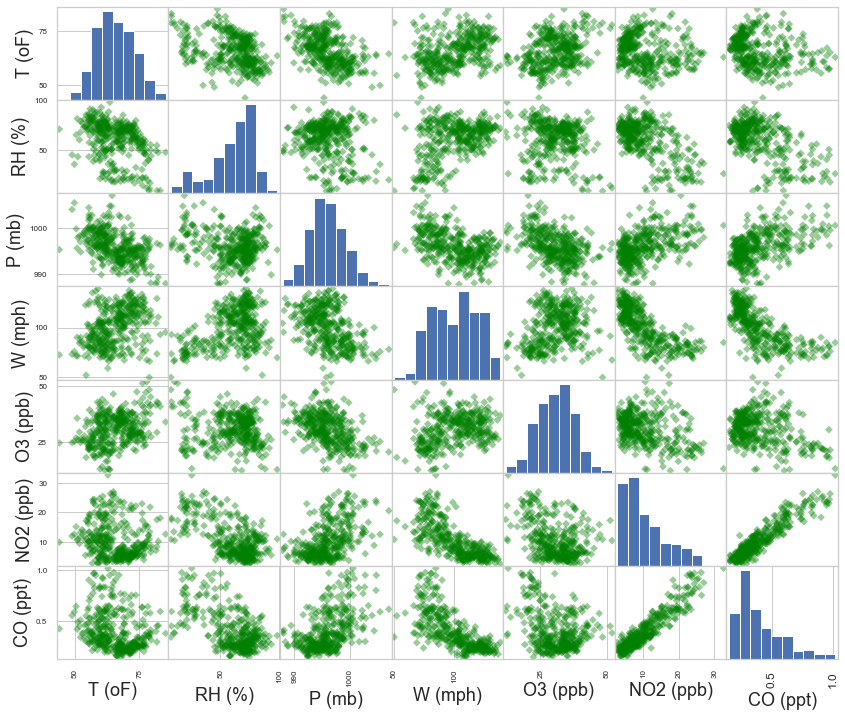

In [94]:
%matplotlib inline
pd.plotting.scatter_matrix(sd_df, 
                           s=30, figsize = [14,12], marker='D', 
                           color = 'green', alpha = 0.4,
                           label = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10},);
# plt.xticks(fontsize=18)
# plt.yticks(fontsize=18)
plt.tick_params(labelsize=12, pad=6);

plt.show()

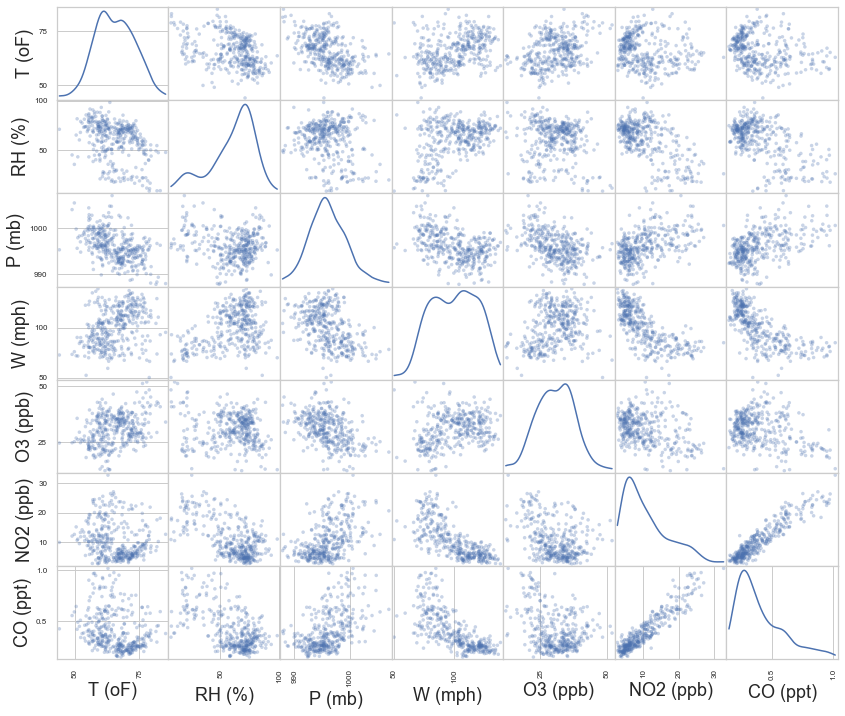

In [89]:
pd.plotting.scatter_matrix(sd_df, s=50, figsize = [14,12], diagonal='kde', alpha=0.3);
plt.show()

In [129]:
sd_df3 = pd.read_csv(file_path3,
    parse_dates=["Date Local"],
# #     na_values=[-200],
    usecols=["Date Local","Temp_mean", "RH_mean", "Pres_mean","O3_ppb_mean"],
    index_col=['Date Local'])
sd_df3.rename(columns = {'Temp_mean':'T (oF)', 'RH_mean':'RH (%)', 
                              'Pres_mean':'P (mb)',
                        "O3_ppb_mean":'O3 (ppb)', 
                       }, inplace = True) 


sd_df3.head(2)

,T (oF),RH (%),P (mb),O3 (ppb)
Date Local,,,,
2014-01-01,55.489583,42.916666,999.845833,22.278182
2014-01-02,58.156250,40.027778,998.504167,18.205909


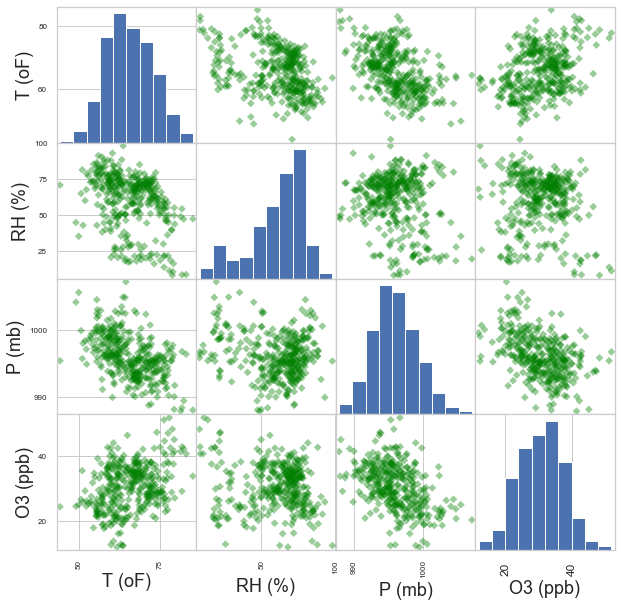

In [139]:
pd.plotting.scatter_matrix(sd_df3, 
                           s=30, figsize = [10,10], marker='D', 
                           color = 'green', alpha = 0.4,
                           label = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10},);
# plt.xticks(fontsize=18)
# plt.yticks(fontsize=18)
plt.tick_params(labelsize=12, pad=6);


plt.savefig('data/output_figures/sandiego_2014_fires/air_quality_csv/weather_ozone_matrix.png')
plt.show()

In [60]:
# sd_df = sd_df.set_index(['Date Local'])

In [64]:
# from pandas.plotting import autocorrelation_plot
# import datetime
# plt.figure()
# autocorrelation_plot(sd_df)

In [65]:
# from pandas.plotting import lag_plot
# plt.figure()

# lag_plot(sd_df)

In [11]:
# Import csv files into dataframe and ensure date time is imported properly.
sd_weather_2014_df = pd.read_csv(file_path1, parse_dates=['Date Local'],
                                index_col=['Date Local'])
sd_weather_2014_df.head()

,T (oF),RH (%),P (mb),wind (mph)
Date Local,,,,
2014-01-01,55.489583,42.916666,999.845833,90.233565
2014-01-02,58.156250,40.027778,998.504167,84.944213
2014-01-03,57.661458,44.597222,996.229167,81.395833
2014-01-04,57.651042,54.402778,996.170833,79.122222
2014-01-05,59.765625,38.708333,999.791667,70.098843


In [ ]:
# sd_weather_2014_df.describe()

In [152]:
# binnning data based on Temp
bins = pd.cut(sd_weather_2014_df["T (oF)"], bins=4, labels=("cool", "warm", "hot", "extrmely hot"))
binned_data= sd_weather_2014_df[["RH (%)", 'P (mb)', 'wind (mph)']].groupby(bins).agg(["mean", "min", "max"])
binned_data

RH (%)                            P (mb)              \
                   mean        min        max        mean         min   
T (oF)                                                                  
cool          66.106043  35.305555  81.541667  998.717559  994.841667   
warm          65.048771  18.180556  98.180555  997.715375  989.893750   
hot           60.477873  16.166667  85.208333  994.591405  988.720833   
extrmely hot  40.567099   8.166666  66.000000  993.801083  987.845833   

                           wind (mph)                         
                      max        mean        min         max  
T (oF)                                                        
cool          1005.520833   82.786735  71.455990  122.619829  
warm          1007.118182   93.933748  52.198958  139.175261  
hot           1002.825000  108.800375  67.354167  137.358333  
extrmely hot   998.016667  103.649239  50.011719  133.569792

In [151]:
# # f.write(bytes(template.format(binned_data.to_latex()),'UTF-8'))
# from pandas import table
# table(ax, binned_data)  # where df is your data frame

# plt.savefig('data/output_figures/sandiego_2014_fires/air_quality_csv/mytable.png')

ImportError: cannot import name 'table' from 'pandas' (C:\Users\bina_\Miniconda3\envs\earth-analytics-python\lib\site-packages\pandas\__init__.py)

In [142]:

import numpy as np
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
from PySide.QtGui import QImage
from PySide.QtGui import QPainter
from PySide.QtCore import QSize
from PySide.QtWebKit import QWebPage


h = "<!DOCTYPE html> <html> <body> <p> " + binned_data.to_html() + " </p> </body> </html>";
page = QWebPage()
page.setViewportSize(QSize(5000,5000))

frame = page.mainFrame()
frame.setHtml(h, "text/html")

img = QImage(1000,700, QImage.Format(5))
painter = QPainter(img)
frame.render(painter)
painter.end()
a = img.save('data/output_figures/sandiego_2014_fires/air_quality_csv/html.png')


ModuleNotFoundError: No module named 'PySide'

In [ ]:
# binnning data based on RH
bins = pd.cut(sd_weather_2014_df["RH (%)"], bins=4, labels=("cool", "warm", "hot", "extrmely hot"))
binned_data2= sd_weather_2014_df[["T (oF)", 'P (mb)', 'wind (mph)']].groupby(bins).agg(["mean", "min", "max"])
binned_data2.head()

In [14]:
# df= sd_weather_2014_df.reset_index(inplace = True)
# df
sd_weather_2014_df.reset_index(inplace = True)
sd_weather_2014_df.head()
# pd.plotting.scatter_matrix(sd_2014_df)

,Date Local,T (oF),RH (%),P (mb),wind (mph)
0,2014-01-01,55.489583,42.916666,999.845833,90.233565
1,2014-01-02,58.156250,40.027778,998.504167,84.944213
2,2014-01-03,57.661458,44.597222,996.229167,81.395833
3,2014-01-04,57.651042,54.402778,996.170833,79.122222
4,2014-01-05,59.765625,38.708333,999.791667,70.098843


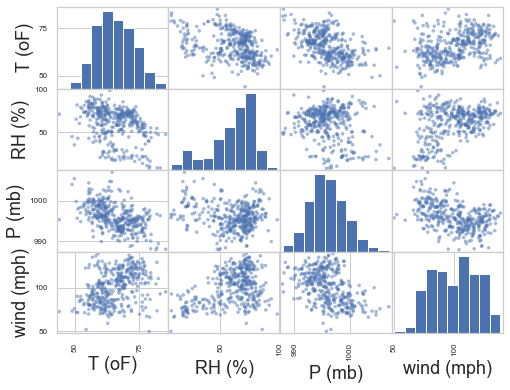

<Figure size 432x288 with 0 Axes>

In [99]:
pd.plotting.scatter_matrix(sd_weather_2014_df, s=50, figsize = [8,6]);
# plt.subplots_adjust(left=0.5, right=0.5)
plt.show()
plt.savefig('data/output_figures/sandiego_2014_fires/air_quality_csv/weather_scatter_matrix.png')

In [ ]:
########  why renaming df does not work???????????
### does not go backward from column to index----
# df= sd_weather_2014_df.reset_index(inplace = True)
# df
# pd.plotting.scatter_matrix(df, s=50, figsize = [8,6]);
# plt.show()

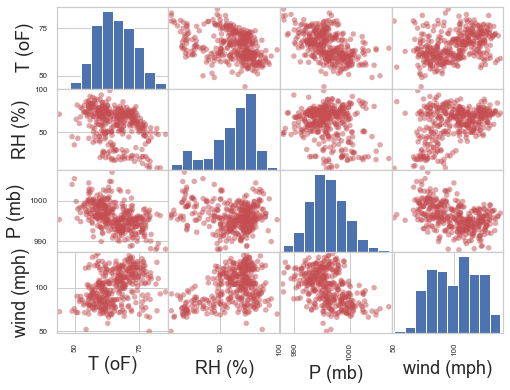

<Figure size 432x288 with 0 Axes>

In [140]:

pd.plotting.scatter_matrix(sd_weather_2014_df, s=30, figsize = [8,6], marker='o', color = 'r');
plt.show()
plt.savefig('data/output_figures/sandiego_2014_fires/air_quality_csv/weather_scatter_matrixb.png')


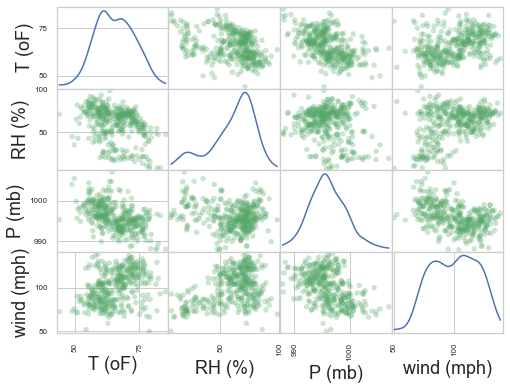

In [124]:
# temp and RH have bionmial distrubution 
# check how to separate %50 RH values???
# from matplotlib import cm
# color = {'columns': 'DarkGreen', 'whiskers': 'DarkOrange',
#           'medians': 'DarkBlue', 'caps': 'Gray'}


pd.plotting.scatter_matrix(sd_weather_2014_df, s=30, figsize = [8,6], diagonal='kde', alpha=0.3, marker='o', color = 'g');
plt.show()

# Autocorrelation plot
Autocorrelation plots are often used for checking randomness in time series. This is done by computing autocorrelations for data values at varying time lags. If time series is random, such autocorrelations should be near zero for any and all time-lag separations. If time series is non-random then one or more of the autocorrelations will be significantly non-zero. The horizontal lines displayed in the plot correspond to 95% and 99% confidence bands. The dashed line is 99% confidence band. See the Wikipedia entry for more about autocorrelation plots.

In [56]:
df = sd_weather_2014_df.set_index(['Date Local'])
df

,T (oF),RH (%),P (mb),wind (mph)
Date Local,,,,
2014-01-01,55.489583,42.916666,999.845833,90.233565
2014-01-02,58.156250,40.027778,998.504167,84.944213
2014-01-03,57.661458,44.597222,996.229167,81.395833
2014-01-04,57.651042,54.402778,996.170833,79.122222
2014-01-05,59.765625,38.708333,999.791667,70.098843
...,...,...,...,...
2014-12-27,49.895833,35.305555,1005.520833,75.965104
2014-12-28,49.015625,44.861111,1004.070833,73.267969
2014-12-29,50.598958,65.041667,999.845833,71.873177


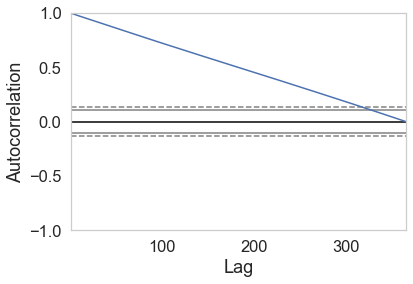

In [57]:
from pandas.plotting import autocorrelation_plot
import datetime
plt.figure()

autocorrelation_plot(df)

In [58]:
sd_pivot_table= sd_weather_2014_df.pivot( columns=['T (oF)', 'RH (%)', 'P (mb)', 'wind (mph)', 'Date Local'], 
                                         

sd_pivot_table.head()

SyntaxError: unexpected EOF while parsing (<ipython-input-58-ec926cc8fa38>, line 4)

In [ ]:
# from pandas.plotting import andrews_curves

# plt.figure()
# Name = (columns = ['T', 'RH', 'P', 'W'])
# andrews_curves(sd_weather_2014_df, "Name" )

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


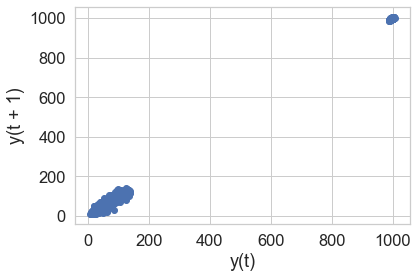

In [62]:
##### ConversionError: Failed to convert timestamps value(s) to axis units
from pandas.plotting import lag_plot
plt.figure()

lag_plot(df)

In [ ]:
# TypeError: unsupported operand type(s) for +: 'Timestamp' and 'float'

# from pandas.plotting import bootstrap_plot
# bootstrap_plot(df, size=50, samples=500, color='green')


In [ ]:
# from sklearn import datasets

# iris = datasets.load_iris()
# X = iris.data
# y = iris.target
# df = pd.DataFrame(X, columns = iris.feature_names)

# pd.plotting.scatter_matrix(sd_weather_2014_df)

# colMap={0:"red",1:"blue",2:"yellow"}
# cols=list(map(lambda x:colMap.get(x),iris.target))
# scatter_matrix(df,  diagonal='hist',c=cols)

# How to map colors
# y = sd_weather_2014_df.target
colors=['r', 'g', 'b', 'c']

pd.plotting.scatter_matrix(sd_weather_2014_df, c=colors, figsize = [8,8],
                      s=50, marker = 'D');

# error = 'c' argument has 4 elements, 
# which is not acceptable for use with 'x' with size 365, 'y' with size 365.

# df['y'] = y

# sns.pairplot(df,hue='y')

In [ ]:
sd_2014_df.drop(columns=["Pres_sem"], inplace = True)
sd_2014_df.head()

In [ ]:
# remove index on data  and remove NAN
# pd.plotting.Categorical.scatter_matrix(sd_2014_df)
colors = ["yellow", "red", "green"]
pd.plotting.scatter_matrix(sd_2014_df, c=sd_2014_df.Survived.apply(lambda x:colors[x])
)


plt.show()

In [ ]:
# remove index on data  and remove NAN
# pd.plotting.Categorical.scatter_matrix(sd_2014_df)
colors = ["yellow", "red", "green"]
pd.plotting.scatter_matrix(sd_2014_df, c=sd_2014_df.Survived.apply(lambda x:colors[x])
)


plt.show()